This dataset is taken from [Kaggle](https://www.kaggle.com/datasets/blastchar/telco-customer-churn?resource=download)

In [ ]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

In [ ]:
data = pd.read_csv('data/WA_Fn-UseC_-Telco-Customer-Churn.csv')
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
data.head().T

,0,1,2,3,4
customerID,7590-VHVEG,5575-GNVDE,3668-QPYBK,7795-CFOCW,9237-HQITU
gender,Female,Male,Male,Male,Female
SeniorCitizen,0,0,0,0,0
Partner,Yes,No,No,No,No
Dependents,No,No,No,No,No
tenure,1,34,2,45,2
PhoneService,No,Yes,Yes,No,Yes
MultipleLines,No phone service,No,No,No phone service,No
InternetService,DSL,DSL,DSL,DSL,Fiber optic
OnlineSecurity,No,Yes,Yes,Yes,No


In [ ]:
data.columns = data.columns.str.lower().str.replace(' ', '_')
categoricals = list(data.dtypes[data.dtypes == 'object'].index)
for c in categoricals:
    data[c] = data[c].str.lower().str.replace(' ', '_')

In [ ]:
data.head().T

,0,1,2,3,4
customerid,7590-vhveg,5575-gnvde,3668-qpybk,7795-cfocw,9237-hqitu
gender,female,male,male,male,female
seniorcitizen,0,0,0,0,0
partner,yes,no,no,no,no
dependents,no,no,no,no,no
tenure,1,34,2,45,2
phoneservice,no,yes,yes,no,yes
multiplelines,no_phone_service,no,no,no_phone_service,no
internetservice,dsl,dsl,dsl,dsl,fiber_optic
onlinesecurity,no,yes,yes,yes,no


In [ ]:
data.dtypes

customerid           object
gender               object
seniorcitizen         int64
partner              object
dependents           object
tenure                int64
phoneservice         object
multiplelines        object
internetservice      object
onlinesecurity       object
onlinebackup         object
deviceprotection     object
techsupport          object
streamingtv          object
streamingmovies      object
contract             object
paperlessbilling     object
paymentmethod        object
monthlycharges      float64
totalcharges         object
churn                object
dtype: object

In [ ]:
data['totalcharges'] = pd.to_numeric(data['totalcharges'], errors='coerce')

In [ ]:
data[data.totalcharges.isnull()][['customerid', 'totalcharges']]

,customerid,totalcharges
488,4472-lvygi,NaN
753,3115-czmzd,NaN
936,5709-lvoeq,NaN
1082,4367-nuyao,NaN
1340,1371-dwpaz,NaN
3331,7644-omvmy,NaN
3826,3213-vvolg,NaN
4380,2520-sgtta,NaN
5218,2923-arzlg,NaN
6670,4075-wkniu,NaN


In [ ]:
data.totalcharges = data.totalcharges.fillna(0)

In [ ]:
data[data.totalcharges.isnull()][['customerid', 'totalcharges']]

,customerid,totalcharges


In [ ]:
data.head()

,customerid,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,...,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn
0,7590-vhveg,female,0,yes,no,1,no,no_phone_service,dsl,no,...,no,no,no,no,month-to-month,yes,electronic_check,29.85,29.85,no
1,5575-gnvde,male,0,no,no,34,yes,no,dsl,yes,...,yes,no,no,no,one_year,no,mailed_check,56.95,1889.50,no
2,3668-qpybk,male,0,no,no,2,yes,no,dsl,yes,...,no,no,no,no,month-to-month,yes,mailed_check,53.85,108.15,yes
3,7795-cfocw,male,0,no,no,45,no,no_phone_service,dsl,yes,...,yes,yes,no,no,one_year,no,bank_transfer_(automatic),42.30,1840.75,no
4,9237-hqitu,female,0,no,no,2,yes,no,fiber_optic,no,...,no,no,no,no,month-to-month,yes,electronic_check,70.70,151.65,yes


In [ ]:
churn = (data.churn == 'yes').astype('int')

In [ ]:
data.churn = churn

In [ ]:
data.head()

,customerid,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,...,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn
0,7590-vhveg,female,0,yes,no,1,no,no_phone_service,dsl,no,...,no,no,no,no,month-to-month,yes,electronic_check,29.85,29.85,0
1,5575-gnvde,male,0,no,no,34,yes,no,dsl,yes,...,yes,no,no,no,one_year,no,mailed_check,56.95,1889.50,0
2,3668-qpybk,male,0,no,no,2,yes,no,dsl,yes,...,no,no,no,no,month-to-month,yes,mailed_check,53.85,108.15,1
3,7795-cfocw,male,0,no,no,45,no,no_phone_service,dsl,yes,...,yes,yes,no,no,one_year,no,bank_transfer_(automatic),42.30,1840.75,0
4,9237-hqitu,female,0,no,no,2,yes,no,fiber_optic,no,...,no,no,no,no,month-to-month,yes,electronic_check,70.70,151.65,1


### Setting up the Validation Framework

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
df_full_train, df_test = train_test_split(data, test_size=0.2, random_state=1)
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=1)

len(df_train), len(df_val), len(df_test)

(4225, 1409, 1409)

In [ ]:
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [ ]:
y_train = df_train.churn.values
y_val = df_val.churn.values
y_test = df_test.churn.values

In [ ]:
del df_train['churn']
del df_val['churn']
del df_test['churn']

### EDA

In [ ]:
df_full_train = df_full_train.reset_index(drop=True)

In [ ]:
df_full_train.isnull().sum()

customerid          0
gender              0
seniorcitizen       0
partner             0
dependents          0
tenure              0
phoneservice        0
multiplelines       0
internetservice     0
onlinesecurity      0
onlinebackup        0
deviceprotection    0
techsupport         0
streamingtv         0
streamingmovies     0
contract            0
paperlessbilling    0
paymentmethod       0
monthlycharges      0
totalcharges        0
churn               0
dtype: int64

In [ ]:
df_full_train.churn.value_counts(normalize=True)

0    0.730032
1    0.269968
Name: churn, dtype: float64

In [ ]:
global_churn_rate = round(df_full_train.churn.mean(),2)

global_churn_rate

0.27

In [ ]:
df_full_train.dtypes

customerid           object
gender               object
seniorcitizen         int64
partner              object
dependents           object
tenure                int64
phoneservice         object
multiplelines        object
internetservice      object
onlinesecurity       object
onlinebackup         object
deviceprotection     object
techsupport          object
streamingtv          object
streamingmovies      object
contract             object
paperlessbilling     object
paymentmethod        object
monthlycharges      float64
totalcharges        float64
churn                 int64
dtype: object

In [ ]:
numerical = ['tenure', 'monthlycharges', 'totalcharges']

In [ ]:
categorical = ['gender', 'seniorcitizen', 'partner', 'dependents',
        'phoneservice', 'multiplelines', 'internetservice',
       'onlinesecurity', 'onlinebackup', 'deviceprotection', 'techsupport',
       'streamingtv', 'streamingmovies', 'contract', 'paperlessbilling',
       'paymentmethod']

In [ ]:
df_full_train[categorical].nunique()

gender              2
seniorcitizen       2
partner             2
dependents          2
phoneservice        2
multiplelines       3
internetservice     3
onlinesecurity      3
onlinebackup        3
deviceprotection    3
techsupport         3
streamingtv         3
streamingmovies     3
contract            3
paperlessbilling    2
paymentmethod       4
dtype: int64

In [ ]:
### Feature importance - Churn rate and risk ratio

In [ ]:
male_churn_rate = df_full_train[df_full_train.gender=='male'].churn.mean()
male_churn_rate

0.2632135306553911

In [ ]:
female_churn_rate = df_full_train[df_full_train.gender=='female'].churn.mean()
female_churn_rate

0.27682403433476394

In [ ]:
global_churn_rate - male_churn_rate

0.006786469344608914

In [ ]:
global_churn_rate - female_churn_rate

-0.006824034334763918

In [ ]:
partner_churn_rate = df_full_train[df_full_train.partner=='yes'].churn.mean()
partner_churn_rate

0.20503330866025166

In [ ]:
no_partner_churn_rate = df_full_train[df_full_train.partner=='no'].churn.mean()
no_partner_churn_rate

0.3298090040927694

In [ ]:
global_churn_rate - partner_churn_rate

0.06496669133974836

In [ ]:
global_churn_rate - no_partner_churn_rate

-0.0598090040927694

In [ ]:
no_partner_risk = no_partner_churn_rate / global_churn_rate
no_partner_risk

1.22151482997322

In [ ]:
partner_risk = partner_churn_rate / global_churn_rate
partner_risk

0.7593826246675986

In [ ]:
df_group = df_full_train.groupby('gender')['churn'].agg(['mean', 'count'])
df_group['diff'] = df_group['mean'] - global_churn_rate
df_group['risk_ratio'] = df_group['mean'] / global_churn_rate
df_group

,mean,count,diff,risk_ratio
gender,,,,
female,0.276824,2796,0.006824,1.025274
male,0.263214,2838,-0.006786,0.974865


In [ ]:
from IPython.display import display

for c in categorical:
    print(c)
    df_group = df_full_train.groupby(c)['churn'].agg(['mean', 'count'])
    df_group['diff'] = df_group['mean'] - global_churn_rate
    df_group['risk_ratio'] = df_group['mean'] / global_churn_rate
    display(df_group)
    print('', end='\n\n')

gender


,mean,count,diff,risk_ratio
gender,,,,
female,0.276824,2796,0.006824,1.025274
male,0.263214,2838,-0.006786,0.974865




seniorcitizen


,mean,count,diff,risk_ratio
seniorcitizen,,,,
0,0.242270,4722,-0.027730,0.897297
1,0.413377,912,0.143377,1.531027




partner


,mean,count,diff,risk_ratio
partner,,,,
no,0.329809,2932,0.059809,1.221515
yes,0.205033,2702,-0.064967,0.759383




dependents


,mean,count,diff,risk_ratio
dependents,,,,
no,0.313760,3968,0.043760,1.162074
yes,0.165666,1666,-0.104334,0.613579




phoneservice


,mean,count,diff,risk_ratio
phoneservice,,,,
no,0.241316,547,-0.028684,0.893764
yes,0.273049,5087,0.003049,1.011292




multiplelines


,mean,count,diff,risk_ratio
multiplelines,,,,
no,0.257407,2700,-0.012593,0.953361
no_phone_service,0.241316,547,-0.028684,0.893764
yes,0.290742,2387,0.020742,1.076820




internetservice


,mean,count,diff,risk_ratio
internetservice,,,,
dsl,0.192347,1934,-0.077653,0.712398
fiber_optic,0.425171,2479,0.155171,1.574709
no,0.077805,1221,-0.192195,0.288167




onlinesecurity


,mean,count,diff,risk_ratio
onlinesecurity,,,,
no,0.420921,2801,0.150921,1.558967
no_internet_service,0.077805,1221,-0.192195,0.288167
yes,0.153226,1612,-0.116774,0.567503




onlinebackup


,mean,count,diff,risk_ratio
onlinebackup,,,,
no,0.404323,2498,0.134323,1.497494
no_internet_service,0.077805,1221,-0.192195,0.288167
yes,0.217232,1915,-0.052768,0.804564




deviceprotection


,mean,count,diff,risk_ratio
deviceprotection,,,,
no,0.395875,2473,0.125875,1.466205
no_internet_service,0.077805,1221,-0.192195,0.288167
yes,0.230412,1940,-0.039588,0.853379




techsupport


,mean,count,diff,risk_ratio
techsupport,,,,
no,0.418914,2781,0.148914,1.551534
no_internet_service,0.077805,1221,-0.192195,0.288167
yes,0.159926,1632,-0.110074,0.592320




streamingtv


,mean,count,diff,risk_ratio
streamingtv,,,,
no,0.342832,2246,0.072832,1.269747
no_internet_service,0.077805,1221,-0.192195,0.288167
yes,0.302723,2167,0.032723,1.121195




streamingmovies


,mean,count,diff,risk_ratio
streamingmovies,,,,
no,0.338906,2213,0.068906,1.255209
no_internet_service,0.077805,1221,-0.192195,0.288167
yes,0.307273,2200,0.037273,1.138047




contract


,mean,count,diff,risk_ratio
contract,,,,
month-to-month,0.431701,3104,0.161701,1.598893
one_year,0.120573,1186,-0.149427,0.446568
two_year,0.028274,1344,-0.241726,0.104718




paperlessbilling


,mean,count,diff,risk_ratio
paperlessbilling,,,,
no,0.172071,2313,-0.097929,0.637300
yes,0.338151,3321,0.068151,1.252412




paymentmethod


,mean,count,diff,risk_ratio
paymentmethod,,,,
bank_transfer_(automatic),0.168171,1219,-0.101829,0.622854
credit_card_(automatic),0.164339,1217,-0.105661,0.608661
electronic_check,0.455890,1893,0.185890,1.688482
mailed_check,0.193870,1305,-0.076130,0.718036


In [ ]:
from sklearn.metrics import mutual_info_score
from functools import partial

In [ ]:
mutual_info_score(df_full_train.churn, df_full_train.gender)

0.0001174846211139946

In [ ]:
mutual_info_score(df_full_train.churn, df_full_train.contract)

0.0983203874041556

In [ ]:
def calc_mi(series): return mutual_info_score(df_full_train.churn, series)

In [ ]:
mi = df_full_train[categorical].apply(calc_mi).sort_values(ascending=False)
mi

contract            0.098320
onlinesecurity      0.063085
techsupport         0.061032
internetservice     0.055868
onlinebackup        0.046923
deviceprotection    0.043453
paymentmethod       0.043210
streamingtv         0.031853
streamingmovies     0.031581
paperlessbilling    0.017589
dependents          0.012346
partner             0.009968
seniorcitizen       0.009410
multiplelines       0.000857
phoneservice        0.000229
gender              0.000117
dtype: float64

### Correlation

In [ ]:
df_full_train[numerical].corrwith(df_full_train.churn)

tenure           -0.351885
monthlycharges    0.196805
totalcharges     -0.196353
dtype: float64

In [ ]:
df_full_train[df_full_train.tenure < 2].churn.mean()

0.6247464503042597

In [ ]:
df_full_train[(df_full_train.tenure >= 2) & (df_full_train.tenure < 12)].churn.mean()

0.42480883602378927

In [ ]:
df_full_train[df_full_train.tenure >= 12].churn.mean()

0.17986881937436933

In [ ]:
df_full_train.tenure.max()

72

In [ ]:
df_full_train[df_full_train.monthlycharges < 20].churn.mean()

0.08829568788501027

In [ ]:
df_full_train[(df_full_train.monthlycharges >= 20) & (df_full_train.tenure < 50)].churn.mean()

0.37267080745341613

In [ ]:
df_full_train[df_full_train.monthlycharges >= 50].churn.mean()

0.3248223216635957

In [ ]:
df_full_train[numerical].corrwith(df_full_train.churn).abs()

tenure            0.351885
monthlycharges    0.196805
totalcharges      0.196353
dtype: float64

### One-hot encoding

In [ ]:
from sklearn.feature_extraction import DictVectorizer

In [ ]:
dv = DictVectorizer(sparse=False)

In [ ]:
df_train[categorical + numerical].iloc[:10].to_dict(orient='records')

[{'gender': 'female',
  'seniorcitizen': 0,
  'partner': 'yes',
  'dependents': 'yes',
  'phoneservice': 'yes',
  'multiplelines': 'yes',
  'internetservice': 'fiber_optic',
  'onlinesecurity': 'yes',
  'onlinebackup': 'yes',
  'deviceprotection': 'yes',
  'techsupport': 'yes',
  'streamingtv': 'yes',
  'streamingmovies': 'yes',
  'contract': 'two_year',
  'paperlessbilling': 'yes',
  'paymentmethod': 'electronic_check',
  'tenure': 72,
  'monthlycharges': 115.5,
  'totalcharges': 8425.15},
 {'gender': 'male',
  'seniorcitizen': 0,
  'partner': 'no',
  'dependents': 'no',
  'phoneservice': 'yes',
  'multiplelines': 'yes',
  'internetservice': 'fiber_optic',
  'onlinesecurity': 'no',
  'onlinebackup': 'yes',
  'deviceprotection': 'yes',
  'techsupport': 'no',
  'streamingtv': 'no',
  'streamingmovies': 'yes',
  'contract': 'month-to-month',
  'paperlessbilling': 'yes',
  'paymentmethod': 'electronic_check',
  'tenure': 10,
  'monthlycharges': 95.25,
  'totalcharges': 1021.55},
 {'gender

In [ ]:
X_train = dv.fit_transform(df_train[categorical + numerical].to_dict(orient='records'))
X_train

array([[0.00000e+00, 0.00000e+00, 1.00000e+00, ..., 1.00000e+00,
        7.20000e+01, 8.42515e+03],
       [1.00000e+00, 0.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        1.00000e+01, 1.02155e+03],
       [1.00000e+00, 0.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        5.00000e+00, 4.13650e+02],
       ...,
       [1.00000e+00, 0.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        2.00000e+00, 1.90050e+02],
       [0.00000e+00, 0.00000e+00, 1.00000e+00, ..., 0.00000e+00,
        2.70000e+01, 7.61950e+02],
       [1.00000e+00, 0.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        9.00000e+00, 7.51650e+02]])

In [ ]:
X_val = dv.transform(df_val[categorical + numerical].to_dict(orient='records'))

### Logistic Regression

In [ ]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

In [ ]:
z = np.linspace(-7, 7, 51)
z

array([-7.0000000e+00, -6.7200000e+00, -6.4400000e+00, -6.1600000e+00,
       -5.8800000e+00, -5.6000000e+00, -5.3200000e+00, -5.0400000e+00,
       -4.7600000e+00, -4.4800000e+00, -4.2000000e+00, -3.9200000e+00,
       -3.6400000e+00, -3.3600000e+00, -3.0800000e+00, -2.8000000e+00,
       -2.5200000e+00, -2.2400000e+00, -1.9600000e+00, -1.6800000e+00,
       -1.4000000e+00, -1.1200000e+00, -8.4000000e-01, -5.6000000e-01,
       -2.8000000e-01,  8.8817842e-16,  2.8000000e-01,  5.6000000e-01,
        8.4000000e-01,  1.1200000e+00,  1.4000000e+00,  1.6800000e+00,
        1.9600000e+00,  2.2400000e+00,  2.5200000e+00,  2.8000000e+00,
        3.0800000e+00,  3.3600000e+00,  3.6400000e+00,  3.9200000e+00,
        4.2000000e+00,  4.4800000e+00,  4.7600000e+00,  5.0400000e+00,
        5.3200000e+00,  5.6000000e+00,  5.8800000e+00,  6.1600000e+00,
        6.4400000e+00,  6.7200000e+00,  7.0000000e+00])

In [ ]:
sigmoid(z)

array([9.11051194e-04, 1.20508423e-03, 1.59386223e-03, 2.10780106e-03,
       2.78699622e-03, 3.68423990e-03, 4.86893124e-03, 6.43210847e-03,
       8.49286285e-03, 1.12064063e-02, 1.47740317e-02, 1.94550846e-02,
       2.55807883e-02, 3.35692233e-02, 4.39398154e-02, 5.73241759e-02,
       7.44679452e-02, 9.62155417e-02, 1.23467048e-01, 1.57095469e-01,
       1.97816111e-01, 2.46011284e-01, 3.01534784e-01, 3.63547460e-01,
       4.30453776e-01, 5.00000000e-01, 5.69546224e-01, 6.36452540e-01,
       6.98465216e-01, 7.53988716e-01, 8.02183889e-01, 8.42904531e-01,
       8.76532952e-01, 9.03784458e-01, 9.25532055e-01, 9.42675824e-01,
       9.56060185e-01, 9.66430777e-01, 9.74419212e-01, 9.80544915e-01,
       9.85225968e-01, 9.88793594e-01, 9.91507137e-01, 9.93567892e-01,
       9.95131069e-01, 9.96315760e-01, 9.97213004e-01, 9.97892199e-01,
       9.98406138e-01, 9.98794916e-01, 9.99088949e-01])

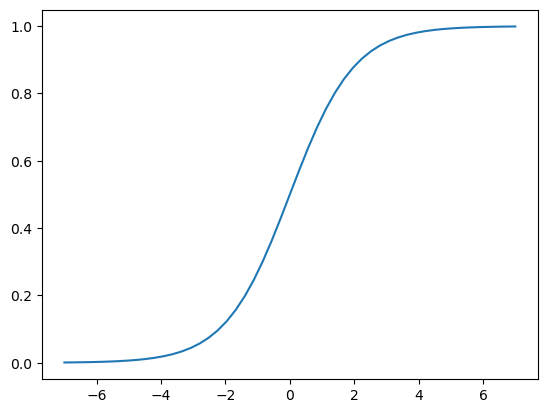

In [ ]:
plt.plot(z, sigmoid(z));

In [ ]:
def linear_regression(xi):
    result = w0
    
    for j in range(len(w)):
        result += xi[j] * w[j]
    
    return result

In [ ]:
def logistic_regression(xi):
    result = w0
    
    for j in range(len(w)):
        result += xi[j] * w[j]
    
    return sigmoid(result)

### Training Logistic Regression with scikit-learn

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
lr = LogisticRegression()

In [ ]:
lr.fit(X_train, y_train)

/Users/abhisheksharma/mambaforge/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
lr.predict(X_train)

array([0, 1, 1, ..., 1, 0, 1])

In [ ]:
lr.predict_proba(X_train)

array([[0.90445091, 0.09554909],
       [0.32106646, 0.67893354],
       [0.3665153 , 0.6334847 ],
       ...,
       [0.4679947 , 0.5320053 ],
       [0.9572626 , 0.0427374 ],
       [0.3017406 , 0.6982594 ]])

In [ ]:
y_pred = lr.predict_proba(X_val)[:, 1]

In [ ]:
y_pred

array([0.0090318 , 0.20561103, 0.21333108, ..., 0.13692382, 0.79929236,
       0.83682706])

In [ ]:
churn_decision = y_pred > 0.5

In [ ]:
#accuracy
(y_val == churn_decision).mean()

0.8026969481902059

In [ ]:
df_prediction = pd.DataFrame()
df_prediction['probability'] = y_pred
df_prediction['prediction'] = churn_decision.astype(int)
df_prediction['actual'] = y_val
df_prediction

,probability,prediction,actual
0,0.009032,0,0
1,0.205611,0,0
2,0.213331,0,0
3,0.543340,1,1
4,0.214850,0,0
...,...,...,...
1404,0.312659,0,0
1405,0.039413,0,1
1406,0.136924,0,0
1407,0.799292,1,1


In [ ]:
df_prediction['correct'] = df_prediction.prediction ==df_prediction.actual

In [ ]:
df_prediction

,probability,prediction,actual,correct
0,0.009032,0,0,True
1,0.205611,0,0,True
2,0.213331,0,0,True
3,0.543340,1,1,True
4,0.214850,0,0,True
...,...,...,...,...
1404,0.312659,0,0,True
1405,0.039413,0,1,False
1406,0.136924,0,0,True
1407,0.799292,1,1,True


In [ ]:
df_prediction.correct.mean()

0.8026969481902059

In [ ]:
dv.get_feature_names()

/Users/abhisheksharma/mambaforge/lib/python3.10/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


['contract=month-to-month',
 'contract=one_year',
 'contract=two_year',
 'dependents=no',
 'dependents=yes',
 'deviceprotection=no',
 'deviceprotection=no_internet_service',
 'deviceprotection=yes',
 'gender=female',
 'gender=male',
 'internetservice=dsl',
 'internetservice=fiber_optic',
 'internetservice=no',
 'monthlycharges',
 'multiplelines=no',
 'multiplelines=no_phone_service',
 'multiplelines=yes',
 'onlinebackup=no',
 'onlinebackup=no_internet_service',
 'onlinebackup=yes',
 'onlinesecurity=no',
 'onlinesecurity=no_internet_service',
 'onlinesecurity=yes',
 'paperlessbilling=no',
 'paperlessbilling=yes',
 'partner=no',
 'partner=yes',
 'paymentmethod=bank_transfer_(automatic)',
 'paymentmethod=credit_card_(automatic)',
 'paymentmethod=electronic_check',
 'paymentmethod=mailed_check',
 'phoneservice=no',
 'phoneservice=yes',
 'seniorcitizen',
 'streamingmovies=no',
 'streamingmovies=no_internet_service',
 'streamingmovies=yes',
 'streamingtv=no',
 'streamingtv=no_internet_servic

In [ ]:
lr.coef_[0].round(3)

array([ 0.474, -0.174, -0.407, -0.029, -0.078,  0.062, -0.089, -0.081,
       -0.034, -0.073, -0.334,  0.316, -0.089,  0.004, -0.257,  0.141,
        0.009,  0.062, -0.089, -0.081,  0.265, -0.089, -0.283, -0.23 ,
        0.123, -0.165,  0.058, -0.087, -0.032,  0.07 , -0.059,  0.141,
       -0.248,  0.215, -0.12 , -0.089,  0.101, -0.071, -0.089,  0.052,
        0.213, -0.089, -0.231, -0.07 ,  0.   ])

In [ ]:
lr.intercept_

array([-0.10859045])

### Model Interpretation

In [ ]:
small = ['contract', 'gender', 'monthlycharges']
df_small = df_train[small]
df_small.head()

,contract,gender,monthlycharges
0,two_year,female,115.50
1,month-to-month,male,95.25
2,month-to-month,female,75.55
3,month-to-month,female,80.85
4,two_year,female,20.10


In [ ]:
small_dict = df_small.to_dict(orient='records')
small_dict_val = df_val[small].to_dict(orient='records')

In [ ]:
dv_small = DictVectorizer(sparse=True)

In [ ]:
X_train_small = dv_small.fit_transform(small_dict)

In [ ]:
X_val_small = dv_small.transform(small_dict_val)

In [ ]:
lr_small = LogisticRegression()

In [ ]:
lr_small.fit(X_train_small, y_train)

LogisticRegression()

In [ ]:
list(zip(dv_small.get_feature_names(), lr_small.coef_[0].round(3)))

/Users/abhisheksharma/mambaforge/lib/python3.10/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


[('contract=month-to-month', 1.675),
 ('contract=one_year', -0.118),
 ('contract=two_year', -1.557),
 ('gender=female', 0.03),
 ('gender=male', -0.03),
 ('monthlycharges', 0.017)]

In [ ]:
lr_small.intercept_.round(3)

array([-3.111])

In [ ]:
sigmoid(-3.111)

0.04265578926403537

In [ ]:
sigmoid(-3.111 + 1 * 1.675 + 1 * (-0.03) + 50 * 0.017)

0.3506917347288658

### Using the model

In [ ]:
full_train_dict = df_full_train[categorical + numerical].to_dict(orient='records')

In [ ]:
dv = DictVectorizer()
X_full_train = dv.fit_transform(full_train_dict)

In [ ]:
y_full_train = df_full_train.churn.values

In [ ]:
model = LogisticRegression()
model.fit(X_full_train, y_full_train)

LogisticRegression()

In [ ]:
X_test = dv.fit_transform(df_test[categorical + numerical].to_dict(orient='records'))

In [ ]:
y_pred = model.predict_proba(X_test)[:, 1]

In [ ]:
churn_decision = y_pred > 0.5
churn_decision

array([False, False, False, ..., False, False,  True])

In [ ]:
(churn_decision == y_test).mean()

0.815471965933286

In [ ]:
customer = df_test[categorical + numerical].to_dict(orient='records')[10]

In [ ]:
customer

{'gender': 'male',
 'seniorcitizen': 1,
 'partner': 'yes',
 'dependents': 'yes',
 'phoneservice': 'yes',
 'multiplelines': 'no',
 'internetservice': 'fiber_optic',
 'onlinesecurity': 'no',
 'onlinebackup': 'yes',
 'deviceprotection': 'no',
 'techsupport': 'no',
 'streamingtv': 'yes',
 'streamingmovies': 'yes',
 'contract': 'month-to-month',
 'paperlessbilling': 'yes',
 'paymentmethod': 'mailed_check',
 'tenure': 32,
 'monthlycharges': 93.95,
 'totalcharges': 2861.45}

In [ ]:
X_small = dv.transform(customer)
model.predict_proba(X_small)

array([[0.5943189, 0.4056811]])